Classical Oracle

In [82]:
my_list=[3, 5, 3, 2, 1, 4, 9, 8, 7] 
N=len(my_list)
print(N)

9


In [83]:
def the_oracle(my_input):
    winner=1
    if my_input is winner:
        response=True
    else:
        response=False
    return response
    

In [84]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i' %index)
        print('%i calls made to the Oracle' %(index+1))
        break
#Best case Oracle is called once, worst case N times.
#On average, Oracle is called N/2 times.

Winner found at index 4
5 calls made to the Oracle


Using Quantum Methods

Simulation:

In [85]:
from qiskit import *
from qiskit_aer import *
import matplotlib.pyplot as plt
import numpy as np

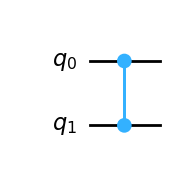

In [86]:
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0, 1)  #controlled Z gate
oracle.to_gate() #makes the oracle into its own gate
oracle.draw(output='mpl')

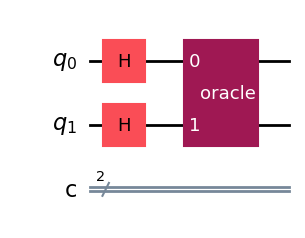

In [87]:
backend = Aer.get_backend('statevector_simulator')
grover_circuit=QuantumCircuit(2,2)
grover_circuit.h([0,1]) #applies hadmard gate on both quibits
grover_circuit.append(oracle, [0,1]) #appends oracle gate
grover_circuit.draw(output='mpl')
#As you can see, two qbits and two classbits 
#Hadmard gate on both qbits and both go to oracle gate (controlled Z gate)


In [88]:
transpiled_grover_circuit = transpile(grover_circuit, backend)
job=backend.run(transpiled_grover_circuit)
result=job.result()

In [89]:
sv=result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

[0.25 0.25 0.25 0.25]


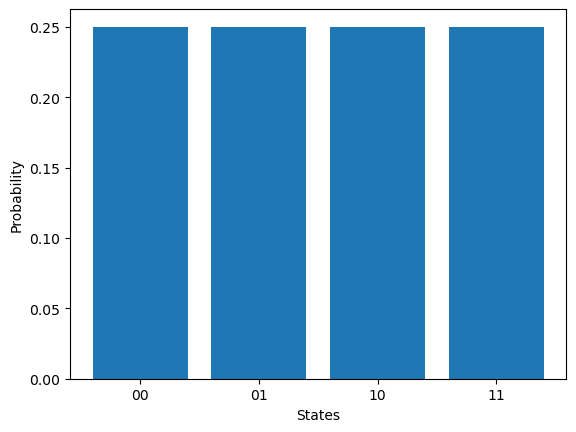

In [90]:
categories=['00', '01', '10', '11']
probabilities = np.abs(sv)**2
print(probabilities)
plt.bar(categories, probabilities)
plt.xlabel('States')
plt.ylabel('Probability')
plt.show()


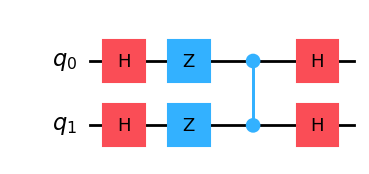

In [91]:
reflection=QuantumCircuit(2, name='reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw(output='mpl')

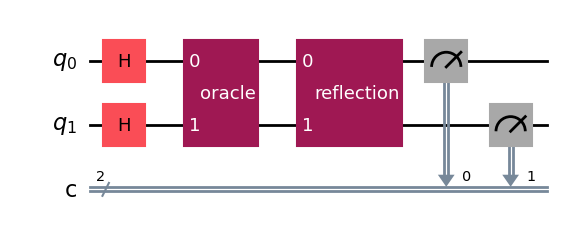

In [92]:
backend=Aer.get_backend('qasm_simulator')
grover_circuit=QuantumCircuit(2,2)
grover_circuit.h([0,1]) #applies hadmard gate on both quibits
grover_circuit.append(oracle, [0,1]) #appends oracle gate
grover_circuit.append(reflection, [0, 1]) #appends reflection gate  
grover_circuit.measure([0,1], [0,1]) #measures qbits
grover_circuit.draw(output='mpl')

In [93]:
final_transpiled_grover_circuit = transpile(grover_circuit, backend)
job=backend.run(final_transpiled_grover_circuit, shots=100)
result=job.result()
result.get_counts() #counts the number of times each state is measured  

{'11': 100}

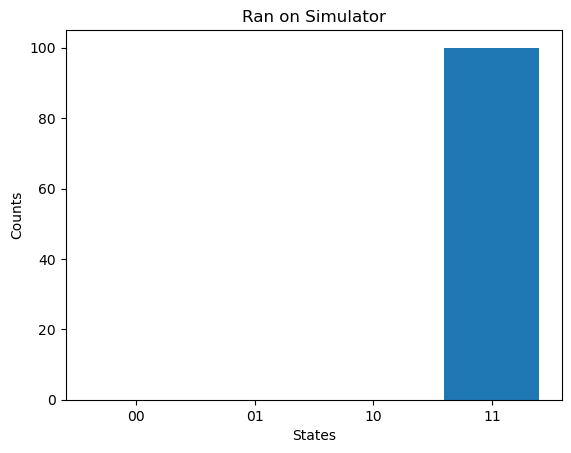

In [98]:
list_of_state_counts=[0, 0, 0, 100]
# Plot the bar graph
plt.bar(categories, list_of_state_counts)
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Ran on Simulator')
plt.show()

Running on Quantum Hardware

In [74]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
backend_name='ibm_kyiv'
backend=QiskitRuntimeService().backend(backend_name)
pass_manager=generate_preset_pass_manager(optimization_level=1, backend=backend)
final_transpiled_grover_circuit = transpile(grover_circuit, backend)

In [75]:
sampler = Sampler(mode=backend)
job = sampler.run([final_transpiled_grover_circuit], shots=100)
job_id = job.job_id()
print(job_id)


czbwf24hfwp000886fjg


In [99]:
service=QiskitRuntimeService()
job_id='czbwf24hfwp000886fjg'        #insert job_id here
job=service.job(job_id)
print(job)

<RuntimeJobV2('czbwf24hfwp000886fjg', 'sampler')>


In [100]:
print(job.result())
job_result=job.result()

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=100, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-03-17 06:56:12', stop='2025-03-17 06:56:12', size=100>)])}, 'version': 2})


In [ ]:
# Assuming 'job_result' is your PrimitiveResult object
pub_result = job_result[0]  # Get the first pub result

# Check the classical register name
classical_register = list(pub_result.data.__dict__.keys())[0]  # Typically 'c'

# Extract counts
counts = pub_result.data.__dict__[classical_register].get_counts()

# Print results
print(counts)

#Notice the slight error, this is due to quantum noise#

{'11': 96, '10': 1, '01': 3}


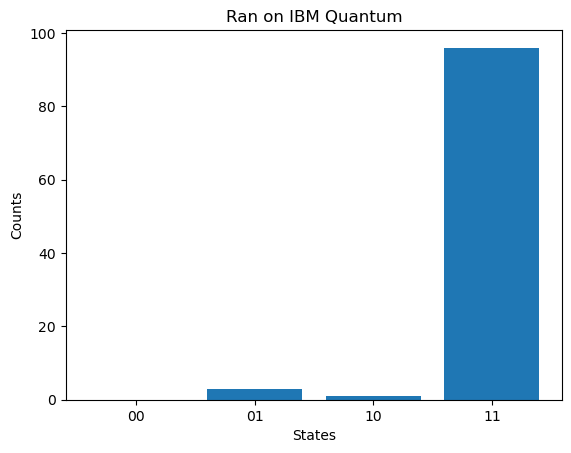

In [102]:
# Extract the counts for each category
counts_list = [counts.get(category, 0) for category in categories]

# Plot the bar graph
plt.bar(categories, counts_list)
plt.xlabel('States')
plt.ylabel('Counts')
plt.title('Ran on IBM Quantum')
plt.show()